# Looi Kah Fung_Lab 4 Naive Bayes_P-COM0049/22

CRISP-DM Methodology 
#Business understanding
The data set comes from teaching assistant evaluation of the Statistics Department, University of
Wilconsin-Madison. The data set is composed of 151 rows of data or examples or instances.
Each instance corresponds to a teaching assistant evaluation from a course. Each instance
describes features/attributes of an object or entity, which in our case here is a teaching assistant
evaluation. In the TEA data set, there are six attributes including the class attribute indicating the
class/category information.

#Data understanding
Quantitative attribute - comprised of discrete & continuous
Qualitative attribute - comprised of ordinal & nominal
Native speaker - nominal 
Course instructor -discrete 
Course - discrete 
Semesterr - nominal 
Class Size - discrete 
Class - ordinal 
https://t4tutorials.com/attributes-types-in-data-mining/

In [2]:
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 

df= pd.read_csv("tae.csv")

In [3]:
#describe the data
df.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [4]:
#print the 1st 5 rows 
df.head(5)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [5]:
#retrieve the preliminary info of the dataset 
df.info

<bound method DataFrame.info of      Native Speaker  Course instructor  Course  Semesterr  Class Size  Class
0                 1                 23       3          1          19      3
1                 2                 15       3          1          17      3
2                 1                 23       3          2          49      3
3                 1                  5       2          2          33      3
4                 2                  7      11          2          55      3
..              ...                ...     ...        ...         ...    ...
146               2                  3       2          2          26      1
147               2                 10       3          2          12      1
148               1                 18       7          2          48      1
149               2                 22       1          2          51      1
150               2                  2      10          2          27      1

[151 rows x 6 columns]>

In [6]:
#print the 1st 5 rows 
df.head(5)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [7]:
#count observations based on attribute 
df['Class'].value_counts()

3    52
2    50
1    49
Name: Class, dtype: int64

In [8]:
#select rows from dataframe, exclude the last attribute 
X=df.iloc[:,:-1]
# sum of null data based on attributes 
X.isnull().sum()

Native Speaker       0
Course instructor    0
Course               0
Semesterr            0
Class Size           0
dtype: int64

#Data Preparation 

In [9]:
#Training dataset 
#select all columns except the last one 
X= df.drop("Class", axis=1)
#set target categorical data label (6th attribute)
y= df["Class"]

#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) #data imbalance, add a new argument stratify = y 

In [10]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
76                2                  5       2          2          48
18                2                 13       3          1          10
82                2                 13       3          1          11
81                2                  9       2          2          39
143               2                  3       2          2          37
31                2                 18       5          2          19
78                1                 23       3          1          25
64                2                  7      11          2          13
55                2                  7      11          2          10
85                2                  7      11          1          20
45                2                  9       5          2          19
12                2                 18      21          2          29
36                2                  4      16          2 

#Modelling 

#Evaluation

In [11]:
#import Naiva Bayes model as GaussianNB (default), BernoulliNB, MultinomialNB
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics 

#instantiate the classifier 
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#Estimate the accuracy of the classifier on test data
y_pred= gnb.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.5434782608695652

The result showed that the highest accuracy obtained by GaussianNB (accuracy=0.543)

Confusion Matrix

<AxesSubplot:>

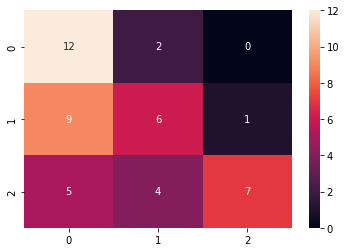

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
# predict the classes of new, unseen data
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g')

In [14]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score
# empty variable for storing the KNN metrics
scores=[]
gnb = GaussianNB()
 # get score for the 10 fold cross validation
score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
scores.append(score.mean())

print("The optimal score is %.2f" % max(scores))

The optimal score is 0.49


Q1: refer to the data understanding 


Q2:
1. The optimal score of KNN model(0.58) is better than Naive Bayes (0.49) in generalizing the model. 